D:\angcoda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\angcoda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\angcoda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
D:\angcoda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\angcoda\Lib\site-packages\statsmodels\tsa\base\tsa_model.p

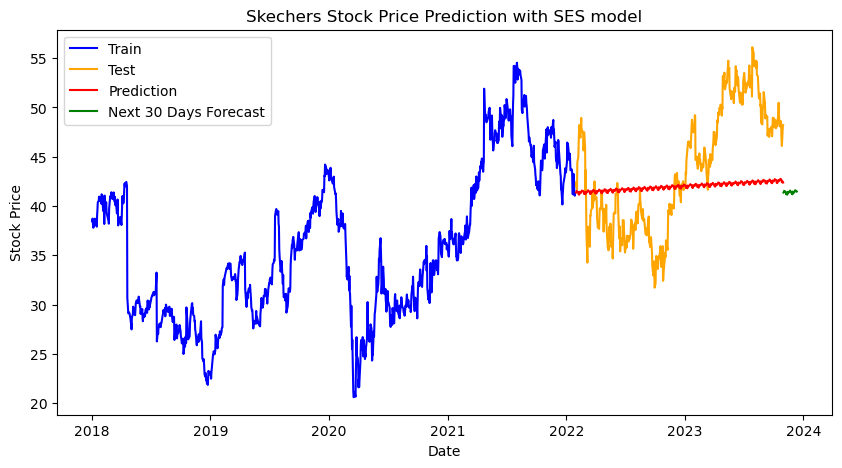

MAE: 5.19
RMSE: 6.11
MAPE: 11.67%
MSE: 37.36


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# Đọc dữ liệu từ tệp Nike.csv
df = pd.read_csv('SKX.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Thay thế giá trị NaN bằng giá trị mean của cột "Close"
df['Close'].fillna(df['Close'].mean(), inplace=True)

# Chia thành tập train và test (tỉ lệ 7:3)
train_size = int(len(df) * 0.7)
train, test = df[:train_size], df[train_size:]

# Huấn luyện mô hình SES trên tập train
model = ExponentialSmoothing(train['Close'], trend='add', seasonal='add', seasonal_periods=12)
result = model.fit()

# Dự đoán trên tập test
forecast_steps = len(test)
predictions = result.forecast(steps=forecast_steps)
predicted_mean = predictions.values

# Dự đoán cho 30 ngày tiếp theo
forecast_steps = 30
forecast_values = result.forecast(steps=forecast_steps)

# Tính toán độ đo chất lượng mô hình
mae = mean_absolute_error(test['Close'], predicted_mean)
rmse = sqrt(mean_squared_error(test['Close'], predicted_mean))
mape = np.mean(np.abs((test['Close'] - predicted_mean) / test['Close'])) * 100
mse = mean_squared_error(test['Close'], predicted_mean)

# Vẽ biểu đồ
plt.figure(figsize=(10, 5))
plt.plot(train['Close'], label='Train', color='blue')
plt.plot(test['Close'], label='Test', color='orange')
plt.plot(test.index, predicted_mean, label='Prediction', color='red')
plt.plot(pd.date_range(test.index[-1] + pd.DateOffset(1), periods=forecast_steps, freq='B'), forecast_values, label='Next 30 Days Forecast', color='green')
plt.title('Skechers Stock Price Prediction with SES model')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# In các độ đo chất lượng mô hình
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAPE: {mape:.2f}%')
print(f'MSE: {mse:.2f}')